#  Blind code Practice

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as smf
import warnings
warnings.filterwarnings('ignore')

In [4]:
beml = pd.read_csv("..\Documents\EXcelR Study and Assignment Material\Data Science\Python\CSV files\BEML.csv",
                   usecols = [0,5])
beml = beml.set_index(pd.DatetimeIndex(beml.Date))
beml.drop('Date', axis = True, inplace = True)
glaxo = pd.read_csv("..\Documents\EXcelR Study and Assignment Material\Data Science\Python\CSV files\GLAXO.csv",
                   usecols = [0,5])
glaxo = glaxo.set_index(pd.DatetimeIndex(glaxo.Date))
glaxo.drop('Date', axis = 1, inplace = True)
display('BEML',beml,'GLAXO',glaxo)

'BEML'

,Close
Date,
2010-01-04,1135.60
2010-01-05,1134.60
2010-01-06,1139.60
2010-01-07,1144.15
2010-01-08,1144.05
...,...
2016-12-26,950.25
2016-12-27,975.70
2016-12-28,974.40


'GLAXO'

,Close
Date,
2010-01-04,1625.65
2010-01-05,1616.80
2010-01-06,1638.50
2010-01-07,1648.70
2010-01-08,1639.80
...,...
2016-12-26,2723.50
2016-12-27,2701.75
2016-12-28,2702.15


Text(0.5, 1.0, 'GLAXO')

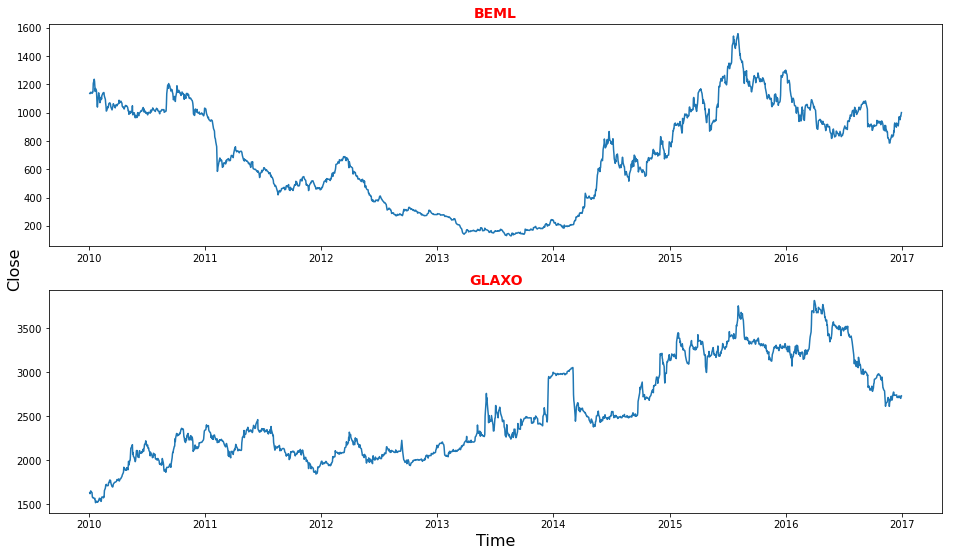

In [5]:
%matplotlib inline
fig = plt.figure(figsize = (16,9))
ax = fig.add_subplot(111)
# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
# Set common labels
ax.set_xlabel('Time', fontsize = 16)
ax.set_ylabel('Close', fontsize = 16)
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax1.plot(beml.Close)
ax2.plot(glaxo.Close)
ax1.set_title('BEML',color ='red', fontsize = 14, fontweight='bold')
ax2.set_title('GLAXO',color ='red', fontsize = 14, fontweight='bold')

In [6]:
beml['Gain'] = beml.Close.pct_change(periods = 1)
beml = beml.dropna()
glaxo['Gain'] = glaxo.Close.pct_change(periods = 1)
glaxo = glaxo.dropna()
display('BEML',beml,'GLAXO',glaxo)

'BEML'

,Close,Gain
Date,,
2010-01-05,1134.60,-0.000881
2010-01-06,1139.60,0.004407
2010-01-07,1144.15,0.003993
2010-01-08,1144.05,-0.000087
2010-01-11,1137.00,-0.006162
...,...,...
2016-12-26,950.25,-0.021924
2016-12-27,975.70,0.026782
2016-12-28,974.40,-0.001332


'GLAXO'

,Close,Gain
Date,,
2010-01-05,1616.80,-0.005444
2010-01-06,1638.50,0.013422
2010-01-07,1648.70,0.006225
2010-01-08,1639.80,-0.005398
2010-01-11,1629.45,-0.006312
...,...,...
2016-12-26,2723.50,-0.001283
2016-12-27,2701.75,-0.007986
2016-12-28,2702.15,0.000148


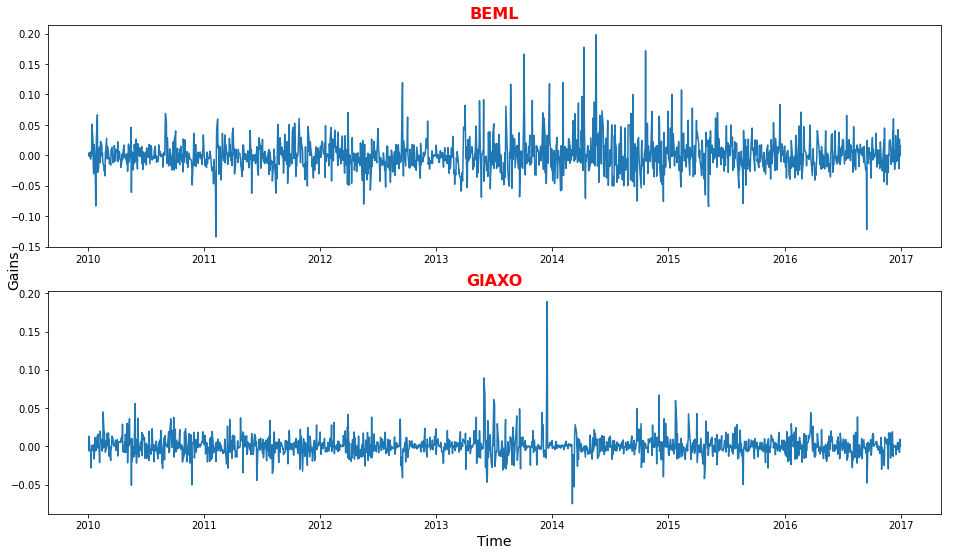

In [6]:
fig = plt.figure(figsize = (16,9))
axes = fig.add_subplot(111)
axes1 = fig.add_subplot(211)
axes2= fig.add_subplot(212)
axes.spines[['top','bottom','right','left']].set_color('none')
axes.tick_params(labelcolor = 'w', top=False, bottom=False, right=False, left=False)
axes1.plot(beml.index, beml.Gain)
axes2.plot(glaxo.index, glaxo.Gain)
axes1.set_title('BEML', color = 'red',fontsize = 16, fontweight = 'bold')
axes2.set_title('GlAXO', color = 'red', fontsize = 16, fontweight = 'bold')
axes.set_xlabel('Time', fontsize = 14)
axes.set_ylabel('Gains', fontsize = 14)
plt.show()

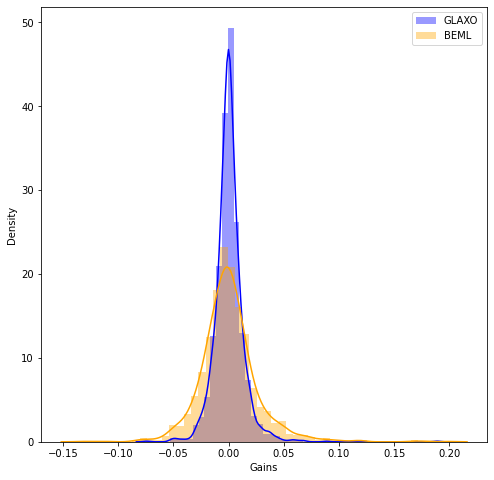

In [9]:
plt.figure(figsize = (8,8))
sns.distplot(glaxo.Gain, label='GLAXO', color='blue', hist =True)
sns.distplot(beml.Gain, label='BEML', color='orange', hist = True)
plt.xlabel('Gains')
plt.ylabel('Density')
plt.legend()
plt.show()

In [12]:
print('For BEML')
BEML = beml.Gain.std()
GLAXO = glaxo.Gain.std()
if BEML > GLAXO:
    print("BEML stocks have higher volatility as far as Daily retunrs are concerned")
elif GLAXO>BEML:
    print("GLAXO stocks have higher volatility as far as Daily retunrs are concerned")

For BEML
BEML stocks have higher volatility as far as Daily retunrs are concerned


In [9]:
print('For BEML')
print('The Probability of making a loss of 2% or more is:',np.round(stats.norm.cdf(-0.02, loc = beml.Gain.mean(), scale = beml.Gain.std())*100,2),'%')
print('The Probability of making a daily return of 2% or more is:',np.round((1-stats.norm.cdf(0.02, loc = beml.Gain.mean(), scale = beml.Gain.std()))*100,2),'%')

For BEML
The Probability of making a loss of 2% or more is: 22.16 %
The Probability of making a daily return of 2% or more is: 22.77 %


In [30]:
print('For GLAXO')
print('The Probability of making a loss of 2% or more is:',np.round(stats.norm.cdf(-0.02, loc = glaxo.Gain.mean(), scale = glaxo.Gain.std())*100,2),'%')
print('The Probability of making a daily return of 2% or more is:',np.round((1-stats.norm.cdf(0.02, loc = glaxo.Gain.mean(), scale = glaxo.Gain.std()))*100,2),'%')

For GLAXO
The Probability of making a loss of 2% or more is: 6.35 %
The Probability of making a daily return of 2% or more is: 7.11 %
